# 1. Simple Addition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gt4py.next as gtx
from gt4py.next import Dims

Next we implement the stencil and a numpy reference version, in order to verify them against each other.

In [2]:
I = gtx.Dimension("I")
J = gtx.Dimension("J")
size = 10

In [3]:
def addition_numpy(a: np.array, b: np.array) -> np.array:
    c = a + b
    return c

In [4]:
@gtx.field_operator
def addition(
    a: gtx.Field[Dims[I, J], float], b: gtx.Field[Dims[I, J], float]
) -> gtx.Field[Dims[I, J], float]:
    return a + b

NameError: name 'Dims' is not defined

In [19]:
def test_addition(backend=None):
    domain = gtx.domain({I: size, J: size})

    a_data = np.fromfunction(lambda xx, yy: xx, domain.shape, dtype=float)
    a = gtx.as_field(domain, a_data, allocator=backend)
    b_data = np.fromfunction(lambda xx, yy: yy, domain.shape, dtype=float)
    b = gtx.as_field(domain, b_data, allocator=backend)

    c_numpy = addition_numpy(a.asnumpy(), b.asnumpy())

    c = gtx.zeros(domain, allocator=backend)

    addition(a, b, out=c, offset_provider={})

    assert np.allclose(c.asnumpy(), c_numpy)

    print("Result:")
    print(c)
    print(c.asnumpy())

    # Plots
    fig, ax = plt.subplot_mosaic([["a", "b", "c"]])
    ax["a"].imshow(a.asnumpy())
    ax["b"].imshow(b.asnumpy())
    ax["c"].imshow(c.asnumpy())

    print("\nTest successful!")

Result:
⟨Domain(I[horizontal]=(0:10), J[horizontal]=(0:10)) → DType(scalar_type=<class 'numpy.float64'>, tensor_shape=())⟩
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]]

Test successful!


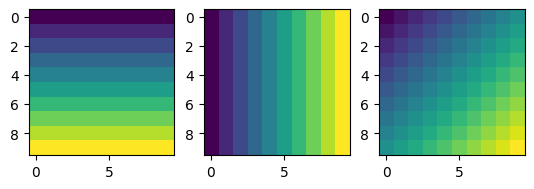

In [20]:
test_addition()